In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [2]:
#df_drugarg = pd.read_csv('../../df_all_sentence_dis_v1.csv')
#df_drugarg = pd.read_csv('../data/df_lab__extended_features.csv')
df_drugarg = pd.read_csv('../data/df_lab__feat_matrix_1.csv')

In [40]:
df_results = pd.read_csv('../tests/results_informed.csv')

In [41]:
df_results

,Unnamed: 0,MAIN,MAIN_prob,SUPPORT,SUPPORT_prob,ATTACK,ATTACK_prob,expected,vote,vote_prob,index,text,review,feats,output_layer,meta_vote
0,0,0,0.849421,0,0.999916,0,0.839012,0,0,0,1937,NaN,NaN,"[0, 0.849420676055092, 0, 0.9999161073921057, ...",0,0
1,1,1,0.901412,3,0.987998,2,0.995558,2,2,2,4942,NaN,NaN,"[1, 0.9014121253785141, 3, 0.9879976157699865,...",2,2
2,2,0,0.817973,0,0.760505,2,0.623465,0,2,0,5305,NaN,NaN,"[0, 0.8179731610568808, 0, 0.7605052504254473,...",2,2
3,3,0,0.961789,0,0.997390,0,0.999429,0,0,0,4759,NaN,NaN,"[0, 0.9617894595132012, 0, 0.9973903966999841,...",0,0
4,4,1,0.812200,0,0.790341,0,0.666261,2,0,1,1095,NaN,NaN,"[1, 0.8122001787905031, 0, 0.7903407040321792,...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1203,0,0.980668,0,0.998379,0,0.999688,0,0,0,4025,NaN,NaN,"[0, 0.9806684177881929, 0, 0.9983792685749271,...",0,0
1204,1204,0,0.543516,3,0.822905,0,0.912922,0,3,0,1024,NaN,NaN,"[0, 0.5435160934487315, 3, 0.8229050036788824,...",3,3
1205,1205,0,0.926105,0,0.994457,0,0.996990,0,0,0,97,NaN,NaN,"[0, 0.9261054561578768, 0, 0.9944565567199659,...",0,0
1206,1206,1,0.927988,0,0.982697,0,0.995973,0,0,0,5462,I lose my cool over the smallest things.,"I've been taking Ortho Tri Cyclen Lo, but I wa...","[1, 0.9279883075352688, 0, 0.982697445196694, ...",0,0


In [7]:
expect = list(df_results['index'])

X_train, X_test, y_train, y_test = train_test_split(
    df_drugarg['Unnamed: 0'], df_drugarg['agreed_labels'], test_size=0.20, random_state=54, stratify=df_drugarg['agreed_labels'])


In [8]:
test_indexes = list(X_test)

In [9]:
df_results['index'] = test_indexes
df_results = df_results.sort_values(by='index')


In [11]:
df_results['text'] = df_drugarg[df_drugarg['Unnamed: 0'].isin(test_indexes)]['sentence'].to_list()
df_results['review'] = df_drugarg[df_drugarg['Unnamed: 0'].isin(test_indexes)]['review'].to_list()

In [12]:
df_results

,Unnamed: 0,MAIN,MAIN_prob,SUPPORT,SUPPORT_prob,ATTACK,ATTACK_prob,expected,vote,vote_prob,index,text,review,feats,output_layer,meta_vote
776,776,0,0.938824,3,0.730113,0,0.954785,3,3,0,6,"Aside from the obvious bad taste, the doses wo...","39 year old male, 1st colonoscopy. I had alre...","[0, 0.9388240823269768, 3, 0.7301126209859861,...",3,3
97,97,1,0.783110,0,0.988711,0,0.874887,2,0,0,9,"Uncomfortable abdominal distension by 7pm, Nau...","Very effective, but.....\r\n1st dose at 6pm da...","[1, 0.7831098436909845, 0, 0.9887114265767816,...",0,0
118,118,0,0.684687,0,0.974105,0,0.859984,0,0,0,16,I chilled it and added vernors with ice.,I am scheduled for a 9am colonoscopy for tomor...,"[0, 0.6846874179104863, 0, 0.9741047034277828,...",0,0
571,571,0,0.859468,0,0.733328,2,0.871234,0,2,2,18,I even took Zofran just in case I experienced ...,I am scheduled for a 9am colonoscopy for tomor...,"[0, 0.8594681909461439, 0, 0.733327583227512, ...",2,2
970,970,0,0.801445,0,0.998821,0,0.997909,0,0,0,20,I called the answering service of my Gastro of...,I am scheduled for a 9am colonoscopy for tomor...,"[0, 0.8014449877073764, 0, 0.99882122877726, 0...",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,926,0,0.737089,0,0.988301,0,0.977650,0,0,0,6009,Stopped taking after 2.5 days.,I was on vacation when I started feeling sympt...,"[0, 0.7370888759776012, 0, 0.9883009622802957,...",0,0
328,328,0,0.984497,0,0.819172,0,0.979725,0,0,0,6011,"I had a horrible case of the flu- coughing, so...",This medicine has been a God send. I had a hor...,"[0, 0.9844965804391657, 0, 0.8191715665998973,...",0,0
942,942,1,0.537691,3,0.957889,0,0.959998,3,3,0,6012,"I started this medication and by two doses in,...",This medicine has been a God send. I had a hor...,"[1, 0.5376909086833533, 3, 0.9578886829713933,...",3,3
74,74,0,0.731171,0,0.934096,0,0.899575,0,0,0,6017,Tamiflu rocks!,"Tamiflu rocks! Had horrible chills, headache, ...","[0, 0.7311706465190246, 0, 0.9340956441462407,...",0,0


In [13]:
print("vote", classification_report(y_true=df_results['expected'], y_pred=df_results['vote']))

print("vote_prob", classification_report(y_true=df_results['expected'], y_pred=df_results['vote_prob']))

print("output_layer", classification_report(y_true=df_results['expected'], y_pred=df_results['output_layer']))

print("meta_vote", classification_report(y_true=df_results['expected'], y_pred=df_results['meta_vote']))



vote               precision    recall  f1-score   support

           0       0.74      0.86      0.79       752
           2       0.57      0.42      0.48       226
           3       0.53      0.38      0.44       230

    accuracy                           0.69      1208
   macro avg       0.61      0.55      0.57      1208
weighted avg       0.67      0.69      0.67      1208

vote_prob               precision    recall  f1-score   support

           0       0.69      0.94      0.80       752
           1       0.00      0.00      0.00         0
           2       0.61      0.19      0.28       226
           3       0.60      0.20      0.31       230

    accuracy                           0.66      1208
   macro avg       0.48      0.33      0.35      1208
weighted avg       0.66      0.66      0.61      1208

output_layer               precision    recall  f1-score   support

           0       0.79      0.82      0.81       752
           2       0.53      0.51      0.52    

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
df_results['well_predicted'] = df_results.apply(lambda row: row['expected'] == row['vote'], axis=1)
df_results['well_predicted_prob'] = df_results.apply(lambda row: row['expected'] == row['vote_prob'], axis=1)
df_results['well_predicted_output_layer'] = df_results.apply(lambda row: row['expected'] == row['output_layer'], axis=1)

In [15]:
df_results[['index', 'MAIN', 'MAIN_prob', 'SUPPORT', 'SUPPORT_prob', 'ATTACK', 'ATTACK_prob', 'expected', 'vote', 'well_predicted', 'vote_prob', 'well_predicted_prob', 'output_layer','well_predicted_output_layer','text', 'review']].to_excel('DrugArgMin_voted_systems_v2.xlsx')



In [16]:
df_results['vote'].value_counts()

0    879
2    165
3    164
Name: vote, dtype: int64

In [17]:
df_results.drop(columns=['Unnamed: 0', 'index'])

,MAIN,MAIN_prob,SUPPORT,SUPPORT_prob,ATTACK,ATTACK_prob,expected,vote,vote_prob,text,review,feats,output_layer,meta_vote,well_predicted,well_predicted_prob,well_predicted_output_layer
776,0,0.938824,3,0.730113,0,0.954785,3,3,0,"Aside from the obvious bad taste, the doses wo...","39 year old male, 1st colonoscopy. I had alre...","[0, 0.9388240823269768, 3, 0.7301126209859861,...",3,3,True,False,True
97,1,0.783110,0,0.988711,0,0.874887,2,0,0,"Uncomfortable abdominal distension by 7pm, Nau...","Very effective, but.....\r\n1st dose at 6pm da...","[1, 0.7831098436909845, 0, 0.9887114265767816,...",0,0,False,False,False
118,0,0.684687,0,0.974105,0,0.859984,0,0,0,I chilled it and added vernors with ice.,I am scheduled for a 9am colonoscopy for tomor...,"[0, 0.6846874179104863, 0, 0.9741047034277828,...",0,0,True,True,True
571,0,0.859468,0,0.733328,2,0.871234,0,2,2,I even took Zofran just in case I experienced ...,I am scheduled for a 9am colonoscopy for tomor...,"[0, 0.8594681909461439, 0, 0.733327583227512, ...",2,2,False,False,False
970,0,0.801445,0,0.998821,0,0.997909,0,0,0,I called the answering service of my Gastro of...,I am scheduled for a 9am colonoscopy for tomor...,"[0, 0.8014449877073764, 0, 0.99882122877726, 0...",0,0,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,0,0.737089,0,0.988301,0,0.977650,0,0,0,Stopped taking after 2.5 days.,I was on vacation when I started feeling sympt...,"[0, 0.7370888759776012, 0, 0.9883009622802957,...",0,0,True,True,True
328,0,0.984497,0,0.819172,0,0.979725,0,0,0,"I had a horrible case of the flu- coughing, so...",This medicine has been a God send. I had a hor...,"[0, 0.9844965804391657, 0, 0.8191715665998973,...",0,0,True,True,True
942,1,0.537691,3,0.957889,0,0.959998,3,3,0,"I started this medication and by two doses in,...",This medicine has been a God send. I had a hor...,"[1, 0.5376909086833533, 3, 0.9578886829713933,...",3,3,True,False,True
74,0,0.731171,0,0.934096,0,0.899575,0,0,0,Tamiflu rocks!,"Tamiflu rocks! Had horrible chills, headache, ...","[0, 0.7311706465190246, 0, 0.9340956441462407,...",0,0,True,True,True


In [18]:
df_results[['MAIN', 'MAIN_prob', 'SUPPORT', 'SUPPORT_prob', 'ATTACK', 'ATTACK_prob', 'expected', 'vote', 'text', 'review']].to_excel('DrugArgMin_voted_systems_v1.xlsx')

In [19]:
df_results[['MAIN', 'MAIN_prob', 'SUPPORT', 'SUPPORT_prob', 'ATTACK', 'ATTACK_prob', 'expected']].corr()

,MAIN,MAIN_prob,SUPPORT,SUPPORT_prob,ATTACK,ATTACK_prob,expected
MAIN,1.000000,-0.231602,0.078098,0.003715,0.046524,-0.020210,0.035406
MAIN_prob,-0.231602,1.000000,0.014907,0.027055,0.016819,0.035882,0.016101
SUPPORT,0.078098,0.014907,1.000000,-0.317052,0.256988,-0.193442,0.387132
SUPPORT_prob,0.003715,0.027055,-0.317052,1.000000,-0.124145,0.197088,-0.247979
ATTACK,0.046524,0.016819,0.256988,-0.124145,1.000000,-0.346936,0.276496
ATTACK_prob,-0.020210,0.035882,-0.193442,0.197088,-0.346936,1.000000,-0.227502
expected,0.035406,0.016101,0.387132,-0.247979,0.276496,-0.227502,1.000000


In [20]:
df_results[['SUPPORT', 'expected']].apply(lambda row: row['SUPPORT'] == row['expected'], axis=1).value_counts()

True     797
False    411
dtype: int64

In [21]:
df_results[['ATTACK', 'expected']].apply(lambda row: row['ATTACK'] == row['expected'], axis=1).value_counts()

True     805
False    403
dtype: int64

In [22]:
df_results[['MAIN', 'expected']].apply(lambda row: row['MAIN'] == row['expected'] if row['expected'] == 0 else row['MAIN'] == 1, axis=1).value_counts()

True     675
False    533
dtype: int64

In [23]:
def concat(row, cols):
    string = ""
    for col in cols:
        string += str(row[col]) + '__'
    string += '___'+str(row['expected'])
    return string

In [24]:
df_results['overview_main'] = df_results.apply(lambda row: concat(row, ['MAIN', 'SUPPORT', 'ATTACK']),axis=1)
df_results['overview_main_att'] = df_results.apply(lambda row: concat(row, ['MAIN', 'ATTACK']),axis=1)
df_results['overview_main_supp'] = df_results.apply(lambda row: concat(row, ['MAIN', 'SUPPORT']),axis=1)
df_results['overview_related'] = df_results.apply(lambda row: concat(row, ['SUPPORT', 'ATTACK']),axis=1)


In [25]:
df_results

,Unnamed: 0,MAIN,MAIN_prob,SUPPORT,SUPPORT_prob,ATTACK,ATTACK_prob,expected,vote,vote_prob,...,feats,output_layer,meta_vote,well_predicted,well_predicted_prob,well_predicted_output_layer,overview_main,overview_main_att,overview_main_supp,overview_related
776,776,0,0.938824,3,0.730113,0,0.954785,3,3,0,...,"[0, 0.9388240823269768, 3, 0.7301126209859861,...",3,3,True,False,True,0__3__0_____3,0__0_____3,0__3_____3,3__0_____3
97,97,1,0.783110,0,0.988711,0,0.874887,2,0,0,...,"[1, 0.7831098436909845, 0, 0.9887114265767816,...",0,0,False,False,False,1__0__0_____2,1__0_____2,1__0_____2,0__0_____2
118,118,0,0.684687,0,0.974105,0,0.859984,0,0,0,...,"[0, 0.6846874179104863, 0, 0.9741047034277828,...",0,0,True,True,True,0__0__0_____0,0__0_____0,0__0_____0,0__0_____0
571,571,0,0.859468,0,0.733328,2,0.871234,0,2,2,...,"[0, 0.8594681909461439, 0, 0.733327583227512, ...",2,2,False,False,False,0__0__2_____0,0__2_____0,0__0_____0,0__2_____0
970,970,0,0.801445,0,0.998821,0,0.997909,0,0,0,...,"[0, 0.8014449877073764, 0, 0.99882122877726, 0...",0,0,True,True,True,0__0__0_____0,0__0_____0,0__0_____0,0__0_____0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,926,0,0.737089,0,0.988301,0,0.977650,0,0,0,...,"[0, 0.7370888759776012, 0, 0.9883009622802957,...",0,0,True,True,True,0__0__0_____0,0__0_____0,0__0_____0,0__0_____0
328,328,0,0.984497,0,0.819172,0,0.979725,0,0,0,...,"[0, 0.9844965804391657, 0, 0.8191715665998973,...",0,0,True,True,True,0__0__0_____0,0__0_____0,0__0_____0,0__0_____0
942,942,1,0.537691,3,0.957889,0,0.959998,3,3,0,...,"[1, 0.5376909086833533, 3, 0.9578886829713933,...",3,3,True,False,True,1__3__0_____3,1__0_____3,1__3_____3,3__0_____3
74,74,0,0.731171,0,0.934096,0,0.899575,0,0,0,...,"[0, 0.7311706465190246, 0, 0.9340956441462407,...",0,0,True,True,True,0__0__0_____0,0__0_____0,0__0_____0,0__0_____0


In [26]:
pd.DataFrame(df_results['overview_main'].value_counts())

,overview_main
0__0__0_____0,443
1__0__0_____0,191
0__0__0_____3,72
0__0__2_____2,52
0__0__0_____2,50
0__3__0_____3,44
1__3__0_____3,35
1__0__0_____2,31
1__0__2_____2,30
1__0__0_____3,28


In [27]:
pd.DataFrame(df_results['overview_related'].value_counts())

,overview_related
0__0_____0,634
0__0_____3,100
0__2_____2,82
0__0_____2,81
3__0_____3,79
0__2_____0,48
3__0_____0,47
3__2_____2,42
3__2_____3,36
3__2_____0,23


In [28]:
pd.DataFrame(df_results['overview_main_supp'].value_counts())

,overview_main_supp
0__0_____0,470
1__0_____0,212
0__0_____2,102
0__0_____3,81
0__3_____3,69
1__0_____2,61
1__3_____3,46
0__3_____0,39
0__3_____2,38
1__0_____3,34


In [29]:
pd.DataFrame(df_results['overview_main_att'].value_counts())

,overview_main_att
0__0_____0,468
1__0_____0,213
0__0_____3,116
0__2_____2,77
0__0_____2,63
1__0_____3,63
1__2_____2,47
0__2_____0,41
1__0_____2,39
0__2_____3,34


### review combinations

In [ ]:
df_results.query('')

In [31]:
sample = df_drugarg[df_drugarg['Unnamed: 0'] == test_indexes[0]].iloc[0]
print(sample.sentence)
print("AGREED: ",sample.agreed_labels)

Everything was fine and it worked well to help me not get pregnant until the depression started.
AGREED:  NON_RELATED


In [32]:
sample

Unnamed: 0                                                    1937
feats            [0.0, 0.0, 0.0, 0.0, 0.0, 0.05263157894736842,...
agreed_labels                                          NON_RELATED
sentence         Everything was fine and it worked well to help...
review           I got on this birth control a month and a half...
Name: 1937, dtype: object

In [33]:
df_results_ = df_results.copy()

In [34]:
def generate_feats(row):
    feats = []
    for col in ['MAIN', 'SUPPORT', 'ATTACK']:
        feats.append(row[col])
        feats.append(row[f"{col}_prob"])
    feats.append(row['vote'])
    return feats

In [35]:
df_results_['feats'] = df_results_.apply(lambda row: generate_feats(row), axis=1)

In [36]:
X = df_results_.feats
y = df_results_.expected
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=54, stratify=y)


In [37]:
#clf = LogisticRegression(random_state=0).fit(X_train.to_list(), y_train.to_list())
#clf = DecisionTreeClassifier(random_state=0).fit(X_train.to_list(), y_train.to_list())
clf = RandomForestClassifier(max_depth=20, random_state=0).fit(X_train.to_list(), y_train.to_list())

In [38]:
predicted_labels = clf.predict(X_test.to_list())

In [39]:
print(classification_report(y_true=y_test, y_pred=predicted_labels))


              precision    recall  f1-score   support

           0       0.77      0.79      0.78       151
           2       0.43      0.40      0.41        45
           3       0.50      0.48      0.49        46

    accuracy                           0.66       242
   macro avg       0.57      0.56      0.56       242
weighted avg       0.65      0.66      0.66       242



In [35]:
#df_results['meta_logreg'] = predicted_labels

In [42]:
df_results_ = df_results.copy()

In [84]:


#df_results_['expected'] = y_expected
df_results_['feats_'] = df_results_.apply(lambda row: generate_feats(row), axis=1)
X = df_results_.feats_
y = df_results_.expected
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=54, stratify=y)
clf = RandomForestClassifier(max_depth=20, random_state=0).fit(X_train.to_list(), y_train.to_list())
predicted_labels = clf.predict(X_test.to_list())
print("output layer: \n", classification_report(y_true=y_test, y_pred=predicted_labels))

output layer: 
               precision    recall  f1-score   support

           0       0.74      0.85      0.79       151
           2       0.52      0.33      0.41        45
           3       0.54      0.46      0.49        46

    accuracy                           0.68       242
   macro avg       0.60      0.55      0.56       242
weighted avg       0.66      0.68      0.66       242



In [85]:
df_output_layer = pd.read_csv('../tests/output_layer_creation.csv')

In [86]:
df_output_layer

,Unnamed: 0,MAIN,MAIN_prob,SUPPORT,SUPPORT_prob,ATTACK,ATTACK_prob,expected,feats
0,0,0,0.981101,0,0.999286,0,0.973218,0,"[0.0, 0.9811008485457531, 0.0, 0.9992864187452..."
1,1,0,0.758941,0,0.991376,0,0.930086,0,"[0.0, 0.7589406442732881, 0.0, 0.9913762806950..."
2,2,0,0.778525,0,0.926558,0,0.991598,0,"[0.0, 0.7785252061225627, 0.0, 0.9265581045617..."
3,3,1,0.827039,0,0.931076,0,0.791428,0,"[1.0, 0.8270389115051626, 0.0, 0.9310763658188..."
4,4,0,0.725396,0,0.995189,2,0.751496,2,"[0.0, 0.7253957287248324, 0.0, 0.9951887789040..."
...,...,...,...,...,...,...,...,...,...
4827,4827,0,0.745091,0,0.950734,0,0.929390,0,"[0.0, 0.7450905587185548, 0.0, 0.9507339858998..."
4828,4828,0,0.875023,0,0.998205,0,0.996243,0,"[0.0, 0.8750230031564056, 0.0, 0.9982045284576..."
4829,4829,0,0.859045,0,0.948457,0,0.995448,0,"[0.0, 0.8590454733822155, 0.0, 0.9484565345773..."
4830,4830,0,0.936186,0,0.958858,0,0.993765,0,"[0.0, 0.936186437820353, 0.0, 0.95885791674797..."


In [89]:
def generate_feats(row):
    feats = []
    for col in ['MAIN', 'SUPPORT', 'ATTACK']:
        feats.append(row[col])
        feats.append(row[f"{col}_prob"])
    return feats


df_output_layer['feats'] = df_output_layer.apply(lambda row: generate_feats(row), axis=1)

X = df_output_layer.feats
y = df_output_layer.expected
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=54, stratify=y)
clf = RandomForestClassifier(max_depth=20, random_state=0).fit(X_train.to_list(), y_train.to_list())
predicted_labels = clf.predict(X_test.to_list())
print("output layer: \n", classification_report(y_true=y_test, y_pred=predicted_labels))

output layer: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       602
           2       0.88      0.91      0.89       181
           3       0.91      0.89      0.90       184

    accuracy                           0.95       967
   macro avg       0.92      0.93      0.93       967
weighted avg       0.95      0.95      0.95       967



In [90]:
df_output_layer

,Unnamed: 0,MAIN,MAIN_prob,SUPPORT,SUPPORT_prob,ATTACK,ATTACK_prob,expected,feats
0,0,0,0.981101,0,0.999286,0,0.973218,0,"[0, 0.9811008485457532, 0, 0.9992864187452009,..."
1,1,0,0.758941,0,0.991376,0,0.930086,0,"[0, 0.7589406442732881, 0, 0.9913762806950708,..."
2,2,0,0.778525,0,0.926558,0,0.991598,0,"[0, 0.7785252061225627, 0, 0.9265581045617708,..."
3,3,1,0.827039,0,0.931076,0,0.791428,0,"[1, 0.8270389115051626, 0, 0.931076365818873, ..."
4,4,0,0.725396,0,0.995189,2,0.751496,2,"[0, 0.7253957287248324, 0, 0.9951887789040746,..."
...,...,...,...,...,...,...,...,...,...
4827,4827,0,0.745091,0,0.950734,0,0.929390,0,"[0, 0.7450905587185548, 0, 0.9507339858998908,..."
4828,4828,0,0.875023,0,0.998205,0,0.996243,0,"[0, 0.8750230031564056, 0, 0.9982045284576706,..."
4829,4829,0,0.859045,0,0.948457,0,0.995448,0,"[0, 0.8590454733822155, 0, 0.9484565345773496,..."
4830,4830,0,0.936186,0,0.958858,0,0.993765,0,"[0, 0.936186437820353, 0, 0.9588579167479724, ..."


In [92]:
_ = df_output_layer[['MAIN','MAIN_prob','SUPPORT','SUPPORT_prob','ATTACK','ATTACK_prob','expected']]



In [97]:
corr = _.corr()
corr

,MAIN,MAIN_prob,SUPPORT,SUPPORT_prob,ATTACK,ATTACK_prob,expected
MAIN,1.000000,-0.262308,0.037732,0.003864,-0.001515,0.009416,0.028473
MAIN_prob,-0.262308,1.000000,0.022835,0.003586,0.050602,-0.016369,0.029961
SUPPORT,0.037732,0.022835,1.000000,-0.380081,0.254667,-0.258327,0.794281
SUPPORT_prob,0.003864,0.003586,-0.380081,1.000000,-0.182847,0.159915,-0.437873
ATTACK,-0.001515,0.050602,0.254667,-0.182847,1.000000,-0.375233,0.532109
ATTACK_prob,0.009416,-0.016369,-0.258327,0.159915,-0.375233,1.000000,-0.414442
expected,0.028473,0.029961,0.794281,-0.437873,0.532109,-0.414442,1.000000


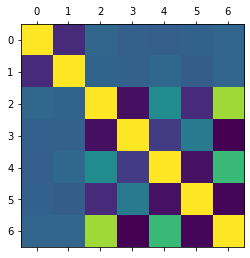

,MAIN,MAIN_prob,SUPPORT,SUPPORT_prob,ATTACK,ATTACK_prob,expected
MAIN,1.000000,-0.262308,0.037732,0.003864,-0.001515,0.009416,0.028473
MAIN_prob,-0.262308,1.000000,0.022835,0.003586,0.050602,-0.016369,0.029961
SUPPORT,0.037732,0.022835,1.000000,-0.380081,0.254667,-0.258327,0.794281
SUPPORT_prob,0.003864,0.003586,-0.380081,1.000000,-0.182847,0.159915,-0.437873
ATTACK,-0.001515,0.050602,0.254667,-0.182847,1.000000,-0.375233,0.532109
ATTACK_prob,0.009416,-0.016369,-0.258327,0.159915,-0.375233,1.000000,-0.414442
expected,0.028473,0.029961,0.794281,-0.437873,0.532109,-0.414442,1.000000


In [99]:
import matplotlib.pyplot as plt
plt.matshow(_.corr())
plt.show()
corr.style.background_gradient(cmap='coolwarm', axis=None)



In [100]:
print("SUPPORT: \n", classification_report(y_true=df_output_layer['SUPPORT'].to_list(), y_pred=df_output_layer['expected'].to_list()))

SUPPORT: 
               precision    recall  f1-score   support

           0       1.00      0.81      0.89      3702
           2       0.00      0.00      0.00         0
           3       0.93      0.76      0.84      1130

    accuracy                           0.80      4832
   macro avg       0.64      0.52      0.58      4832
weighted avg       0.98      0.80      0.88      4832



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
print("ATTACK: \n", classification_report(y_true=df_output_layer['ATTACK'].to_list(), y_pred=df_output_layer['expected'].to_list()))

ATTACK: 
               precision    recall  f1-score   support

           0       1.00      0.80      0.89      3744
           2       0.96      0.80      0.87      1088
           3       0.00      0.00      0.00         0

    accuracy                           0.80      4832
   macro avg       0.65      0.53      0.59      4832
weighted avg       0.99      0.80      0.89      4832



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [103]:
print("MAIN: \n", classification_report(y_true=df_output_layer['MAIN'].to_list(), y_pred=df_output_layer['expected'].to_list()))

MAIN: 
               precision    recall  f1-score   support

           0       0.67      0.63      0.65      3209
           1       0.00      0.00      0.00      1623
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.42      4832
   macro avg       0.17      0.16      0.16      4832
weighted avg       0.45      0.42      0.43      4832



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1

In [115]:
def radical_vote(row, threshold: float = 0.55):
    if row['SUPPORT'] == 0 and row['ATTACK'] == 0:
        return 0
    elif row['SUPPORT'] != 0 and row['ATTACK'] != 0:
        if row['SUPPORT_prob'] >= row['ATTACK_prob']:
            return 3
        else:
            return 2
    else:
        if row['SUPPORT'] == 3 and row['SUPPORT_prob'] >= threshold:
            return 3
        elif row['ATTACK'] == 2 and row['ATTACK_prob'] >= threshold:
            return 2
        else:
            return 0
            


In [116]:
df_output_layer['radical_vote'] = df_output_layer.apply(radical_vote, axis=1)

In [117]:
df_output_layer

,Unnamed: 0,MAIN,MAIN_prob,SUPPORT,SUPPORT_prob,ATTACK,ATTACK_prob,expected,feats,radical_vote
0,0,0,0.981101,0,0.999286,0,0.973218,0,"[0, 0.9811008485457532, 0, 0.9992864187452009,...",0
1,1,0,0.758941,0,0.991376,0,0.930086,0,"[0, 0.7589406442732881, 0, 0.9913762806950708,...",0
2,2,0,0.778525,0,0.926558,0,0.991598,0,"[0, 0.7785252061225627, 0, 0.9265581045617708,...",0
3,3,1,0.827039,0,0.931076,0,0.791428,0,"[1, 0.8270389115051626, 0, 0.931076365818873, ...",0
4,4,0,0.725396,0,0.995189,2,0.751496,2,"[0, 0.7253957287248324, 0, 0.9951887789040746,...",2
...,...,...,...,...,...,...,...,...,...,...
4827,4827,0,0.745091,0,0.950734,0,0.929390,0,"[0, 0.7450905587185548, 0, 0.9507339858998908,...",0
4828,4828,0,0.875023,0,0.998205,0,0.996243,0,"[0, 0.8750230031564056, 0, 0.9982045284576706,...",0
4829,4829,0,0.859045,0,0.948457,0,0.995448,0,"[0, 0.8590454733822155, 0, 0.9484565345773496,...",0
4830,4830,0,0.936186,0,0.958858,0,0.993765,0,"[0, 0.936186437820353, 0, 0.9588579167479724, ...",0


In [118]:
print("RADICAL: \n", classification_report(y_true=df_output_layer['radical_vote'].to_list(), y_pred=df_output_layer['expected'].to_list()))

RADICAL: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      3132
           2       0.86      0.93      0.89       843
           3       0.85      0.91      0.88       857

    accuracy                           0.94      4832
   macro avg       0.90      0.93      0.92      4832
weighted avg       0.95      0.94      0.94      4832



#### on results

In [138]:
df_results

,Unnamed: 0,MAIN,MAIN_prob,SUPPORT,SUPPORT_prob,ATTACK,ATTACK_prob,expected,vote,vote_prob,index,text,review,feats,output_layer,meta_vote,radical_vote,expected_binary
0,0,0,0.849421,0,0.999916,0,0.839012,0,0,0,1937,NaN,NaN,"[0, 0.849420676055092, 0, 0.9999161073921057, ...",0,0,0,0
1,1,1,0.901412,3,0.987998,2,0.995558,2,2,2,4942,NaN,NaN,"[1, 0.9014121253785141, 3, 0.9879976157699865,...",2,2,2,1
2,2,0,0.817973,0,0.760505,2,0.623465,0,2,0,5305,NaN,NaN,"[0, 0.8179731610568808, 0, 0.7605052504254473,...",2,2,2,0
3,3,0,0.961789,0,0.997390,0,0.999429,0,0,0,4759,NaN,NaN,"[0, 0.9617894595132012, 0, 0.9973903966999841,...",0,0,0,0
4,4,1,0.812200,0,0.790341,0,0.666261,2,0,1,1095,NaN,NaN,"[1, 0.8122001787905031, 0, 0.7903407040321792,...",0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1203,0,0.980668,0,0.998379,0,0.999688,0,0,0,4025,NaN,NaN,"[0, 0.9806684177881929, 0, 0.9983792685749271,...",0,0,0,0
1204,1204,0,0.543516,3,0.822905,0,0.912922,0,3,0,1024,NaN,NaN,"[0, 0.5435160934487315, 3, 0.8229050036788824,...",3,3,3,0
1205,1205,0,0.926105,0,0.994457,0,0.996990,0,0,0,97,NaN,NaN,"[0, 0.9261054561578768, 0, 0.9944565567199659,...",0,0,0,0
1206,1206,1,0.927988,0,0.982697,0,0.995973,0,0,0,5462,I lose my cool over the smallest things.,"I've been taking Ortho Tri Cyclen Lo, but I wa...","[1, 0.9279883075352688, 0, 0.982697445196694, ...",0,0,0,0


In [136]:
df_results['expected_binary'] = df_results['expected'].apply(lambda value: 0 if value==0 else 1)

In [137]:
print("Only binary: \n", classification_report(y_true=df_results['MAIN'].to_list(), y_pred=df_results['expected_binary'].to_list()))

Only binary: 
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       799
           1       0.36      0.41      0.38       409

    accuracy                           0.56      1208
   macro avg       0.52      0.52      0.52      1208
weighted avg       0.57      0.56      0.56      1208



In [139]:
_ = df_results[['MAIN','MAIN_prob','SUPPORT','SUPPORT_prob','ATTACK','ATTACK_prob','expected', 'expected_binary']]

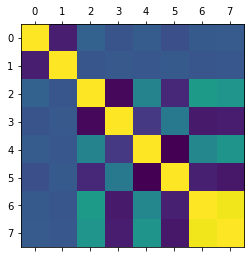

,MAIN,MAIN_prob,SUPPORT,SUPPORT_prob,ATTACK,ATTACK_prob,expected,expected_binary
MAIN,1.000000,-0.231602,0.078098,0.003715,0.046524,-0.020210,0.035406,0.041893
MAIN_prob,-0.231602,1.000000,0.014907,0.027055,0.016819,0.035882,0.016101,0.016868
SUPPORT,0.078098,0.014907,1.000000,-0.317052,0.256988,-0.193442,0.387132,0.356759
SUPPORT_prob,0.003715,0.027055,-0.317052,1.000000,-0.124145,0.197088,-0.247979,-0.238664
ATTACK,0.046524,0.016819,0.256988,-0.124145,1.000000,-0.346936,0.276496,0.348313
ATTACK_prob,-0.020210,0.035882,-0.193442,0.197088,-0.346936,1.000000,-0.227502,-0.261351
expected,0.035406,0.016101,0.387132,-0.247979,0.276496,-0.227502,1.000000,0.969447
expected_binary,0.041893,0.016868,0.356759,-0.238664,0.348313,-0.261351,0.969447,1.000000


In [140]:
corr = _.corr()
plt.matshow(corr)
plt.show()
corr.style.background_gradient(cmap='coolwarm', axis=None)



In [134]:
# on results?

df_results['radical_vote'] = df_results.apply(lambda row:radical_vote(row, 0.5), axis=1)


In [135]:
print("RADICAL: \n", classification_report(y_true=df_results['radical_vote'].to_list(), y_pred=df_results['expected'].to_list()))

RADICAL: 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       815
           2       0.47      0.56      0.51       191
           3       0.46      0.52      0.49       202

    accuracy                           0.70      1208
   macro avg       0.59      0.62      0.60      1208
weighted avg       0.72      0.70      0.71      1208

